<a href="https://colab.research.google.com/github/cosmicishan/Cifar-10-classification-on-Pytorch/blob/main/CIFAR10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Dependency**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# import libraries for image
import torchvision
import torchvision.transforms as transforms

# import torch libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## **Prerequisite (Data and supporting function)**

#### Check GPU requirement

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


#### Download the data and create dataloader

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### Create function to show image

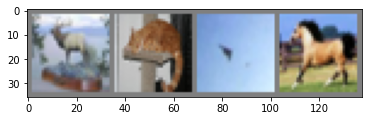

 Deer   Cat Plane Horse


In [ ]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

## **NetA**

#### Create a NetworkA

In [ ]:
class NetA(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(3072, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

netA = NetA().to(device)

#### Define loss and optimizer

In [ ]:
criterionA = nn.CrossEntropyLoss()
optimizerA = optim.SGD(netA.parameters(), lr=0.001, momentum=0.9)

#### Train the NetworkA

In [ ]:
train_acc_A, test_acc_A = [], []

# training network for 50 epochs
for epoch in range(50):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizerA.zero_grad()

        # forward + backward + optimize
        outputs = netA(inputs)
        loss = criterionA(outputs, labels)
        loss.backward()
        optimizerA.step()

    # checking accuracy for the training data 
    correct_train, total_train = 0, 0
    for data in trainloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = netA(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    current_train_acc = 100 * correct_train / total_train
    train_acc_A.append(current_train_acc)

    # checking accuracy for the training data 
    correct_test, total_test = 0, 0
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = netA(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

    current_test_acc = 100 * correct_test / total_test
    test_acc_A.append(current_test_acc)

    print("Epoch %d completed : Training Accuracy - %d%% | Test Accuracy - %d%%" %(epoch+1, current_train_acc, current_test_acc))

print("-"*50)
print('Finished Training')

Epoch 1 completed : Training Accuracy - 34% | Test Accuracy - 32%
Epoch 2 completed : Training Accuracy - 36% | Test Accuracy - 33%
Epoch 3 completed : Training Accuracy - 36% | Test Accuracy - 33%
Epoch 4 completed : Training Accuracy - 37% | Test Accuracy - 33%
Epoch 5 completed : Training Accuracy - 37% | Test Accuracy - 34%
Epoch 6 completed : Training Accuracy - 38% | Test Accuracy - 34%
Epoch 7 completed : Training Accuracy - 35% | Test Accuracy - 32%
Epoch 8 completed : Training Accuracy - 37% | Test Accuracy - 32%
Epoch 9 completed : Training Accuracy - 34% | Test Accuracy - 29%
Epoch 10 completed : Training Accuracy - 37% | Test Accuracy - 32%
Epoch 11 completed : Training Accuracy - 36% | Test Accuracy - 32%
Epoch 12 completed : Training Accuracy - 38% | Test Accuracy - 34%
Epoch 13 completed : Training Accuracy - 37% | Test Accuracy - 32%
Epoch 14 completed : Training Accuracy - 38% | Test Accuracy - 34%
Epoch 15 completed : Training Accuracy - 39% | Test Accuracy - 34%
Epoc

Plotting accuracy for training and test data

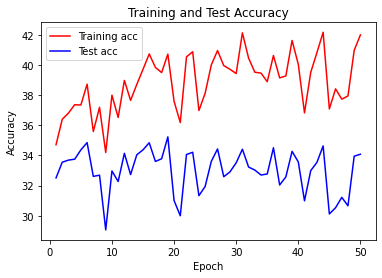

In [ ]:
plt.plot(range(1, len(train_acc_A)+1), train_acc_A, label='Training acc', color='red')
plt.plot(range(1, len(test_acc_A)+1), test_acc_A, label='Test acc', color='blue')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Saving model

In [ ]:
pathA = '/content/drive/MyDrive/Assignments/Sporty Guru/cifar_netA.pth'
torch.save(netA.state_dict(), pathA)

#### Test the network on the test data

Groundtruth

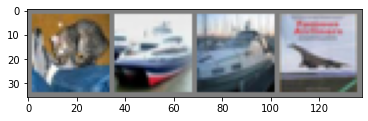

GroundTruth:    Cat  Ship  Ship Plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Output of NetA

In [ ]:
test_netA = NetA()
test_netA.load_state_dict(torch.load(pathA))

outputs = test_netA(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   Frog Truck  Ship  Bird


#### Check Accuracy

Check overall accuracy

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = test_netA(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 34 %


Check accuracy of each class

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = test_netA(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))

Accuracy for class Plane is: 40.2 %
Accuracy for class Car   is: 45.8 %
Accuracy for class Bird  is: 22.8 %
Accuracy for class Cat   is: 18.0 %
Accuracy for class Deer  is: 35.7 %
Accuracy for class Dog   is: 23.2 %
Accuracy for class Frog  is: 43.1 %
Accuracy for class Horse is: 37.2 %
Accuracy for class Ship  is: 47.0 %
Accuracy for class Truck is: 27.8 %


## **NetB**

#### Create a NetworkB

In [ ]:
class NetB(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(3072, 300)
        self.out = nn.Linear(300, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc(x))
        x = self.out(x)
        return x

netB = NetB().to(device)

#### Define loss and optimizer

In [ ]:
criterionB = nn.CrossEntropyLoss()
optimizerB = optim.SGD(netB.parameters(), lr=0.001, momentum=0.9)

#### Train the NetworkB

In [ ]:
train_acc_B, test_acc_B = [], []

# training network for 50 epochs
for epoch in range(50):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizerB.zero_grad()

        # forward + backward + optimize
        outputs = netB(inputs)
        loss = criterionB(outputs, labels)
        loss.backward()
        optimizerB.step()

    # checking accuracy for the training data 
    correct_train, total_train = 0, 0
    for data in trainloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = netB(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    current_train_acc = 100 * correct_train / total_train
    train_acc_B.append(current_train_acc)

    # checking accuracy for the training data 
    correct_test, total_test = 0, 0
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = netB(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

    current_test_acc = 100 * correct_test / total_test
    test_acc_B.append(current_test_acc)

    print("Epoch %d completed : Training Accuracy - %d%% | Test Accuracy - %d%%" %(epoch+1, current_train_acc, current_test_acc))

print("-"*50)
print('Finished Training')

Epoch 1 completed : Training Accuracy - 48% | Test Accuracy - 47%
Epoch 2 completed : Training Accuracy - 51% | Test Accuracy - 47%
Epoch 3 completed : Training Accuracy - 55% | Test Accuracy - 49%
Epoch 4 completed : Training Accuracy - 56% | Test Accuracy - 49%
Epoch 5 completed : Training Accuracy - 57% | Test Accuracy - 48%
Epoch 6 completed : Training Accuracy - 61% | Test Accuracy - 50%
Epoch 7 completed : Training Accuracy - 61% | Test Accuracy - 49%
Epoch 8 completed : Training Accuracy - 63% | Test Accuracy - 50%
Epoch 9 completed : Training Accuracy - 64% | Test Accuracy - 50%
Epoch 10 completed : Training Accuracy - 65% | Test Accuracy - 50%
Epoch 11 completed : Training Accuracy - 68% | Test Accuracy - 51%
Epoch 12 completed : Training Accuracy - 69% | Test Accuracy - 50%
Epoch 13 completed : Training Accuracy - 67% | Test Accuracy - 48%
Epoch 14 completed : Training Accuracy - 68% | Test Accuracy - 48%
Epoch 15 completed : Training Accuracy - 71% | Test Accuracy - 50%
Epoc

Plotting accuracy for training and test data

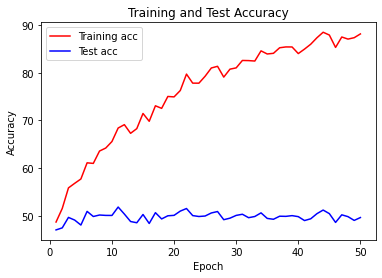

In [ ]:
plt.plot(range(1, len(train_acc_B)+1), train_acc_B, label='Training acc', color='red')
plt.plot(range(1, len(test_acc_B)+1), test_acc_B, label='Test acc', color='blue')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Saving model

In [ ]:
pathB = '/content/drive/MyDrive/Assignments/Sporty Guru/cifar_netB.pth'
torch.save(netB.state_dict(), pathB)

#### Test the network on the test data

Groundtruth

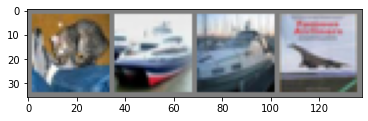

GroundTruth:    Cat  Ship  Ship Plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Output of NetB

In [ ]:
test_netB = NetB()
test_netB.load_state_dict(torch.load(pathB))

outputs = test_netB(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    Cat   Car Plane Plane


#### Check Accuracy

Check overall accuracy

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = test_netB(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 49 %


Check accuracy of each class

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = test_netB(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))

Accuracy for class Plane is: 53.2 %
Accuracy for class Car   is: 54.0 %
Accuracy for class Bird  is: 34.8 %
Accuracy for class Cat   is: 37.5 %
Accuracy for class Deer  is: 43.6 %
Accuracy for class Dog   is: 39.7 %
Accuracy for class Frog  is: 56.9 %
Accuracy for class Horse is: 57.0 %
Accuracy for class Ship  is: 60.9 %
Accuracy for class Truck is: 59.1 %


## **NetC**

#### Create a NetworkC

In [ ]:
class NetC(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3, 5, (5, 25))
        self.pool = nn.MaxPool2d(3, stride=2)
        self.out = nn.Linear(195, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        # print(x.shape)
        x = torch.flatten(x, 1)
        # print(x.shape)
        x = self.out(x)
        return x

netC = NetC().to(device)

#### Define loss and optimizer

In [ ]:
criterionC = nn.CrossEntropyLoss()
optimizerC = optim.SGD(netC.parameters(), lr=0.001, momentum=0.9)

#### Train the NetworkC

In [ ]:
train_acc_C, test_acc_C = [], []

# training network for 50 epochs
for epoch in range(50):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizerC.zero_grad()

        # forward + backward + optimize
        outputs = netC(inputs)
        loss = criterionC(outputs, labels)
        loss.backward()
        optimizerC.step()

    # checking accuracy for the training data 
    correct_train, total_train = 0, 0
    for data in trainloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = netC(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    current_train_acc = 100 * correct_train / total_train
    train_acc_C.append(current_train_acc)

    # checking accuracy for the training data 
    correct_test, total_test = 0, 0
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = netC(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

    current_test_acc = 100 * correct_test / total_test
    test_acc_C.append(current_test_acc)

    print("Epoch %d completed : Training Accuracy - %d%% | Test Accuracy - %d%%" %(epoch+1, current_train_acc, current_test_acc))

print("-"*50)
print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1 completed : Training Accuracy - 40% | Test Accuracy - 40%
Epoch 2 completed : Training Accuracy - 43% | Test Accuracy - 42%
Epoch 3 completed : Training Accuracy - 43% | Test Accuracy - 42%
Epoch 4 completed : Training Accuracy - 42% | Test Accuracy - 41%
Epoch 5 completed : Training Accuracy - 40% | Test Accuracy - 39%
Epoch 6 completed : Training Accuracy - 43% | Test Accuracy - 41%
Epoch 7 completed : Training Accuracy - 43% | Test Accuracy - 43%
Epoch 8 completed : Training Accuracy - 42% | Test Accuracy - 41%
Epoch 9 completed : Training Accuracy - 43% | Test Accuracy - 42%
Epoch 10 completed : Training Accuracy - 45% | Test Accuracy - 44%
Epoch 11 completed : Training Accuracy - 47% | Test Accuracy - 45%
Epoch 12 completed : Training Accuracy - 46% | Test Accuracy - 44%
Epoch 13 completed : Training Accuracy - 43% | Test Accuracy - 42%
Epoch 14 completed : Training Accuracy - 45% | Test Accuracy - 43%
Epoch 15 completed : Training Accuracy - 46% | Test Accuracy - 45%
Epoc

Plotting accuracy for training and test data

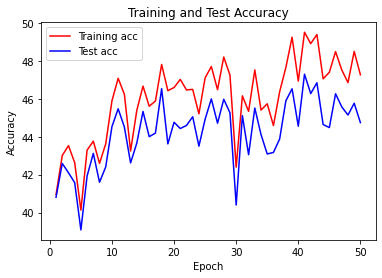

In [ ]:
plt.plot(range(1, len(train_acc_C)+1), train_acc_C, label='Training acc', color='red')
plt.plot(range(1, len(test_acc_C)+1), test_acc_C, label='Test acc', color='blue')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Saving model

In [ ]:
pathC = '/content/drive/MyDrive/Assignments/Sporty Guru/cifar_netC.pth'
torch.save(netC.state_dict(), pathC)

#### Test the network on the test data

Groundtruth

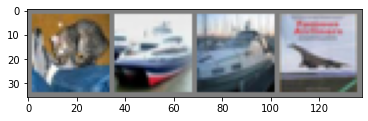

GroundTruth:    Cat  Ship  Ship Plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Output of NetC

In [ ]:
test_netC = NetC()
test_netC.load_state_dict(torch.load(pathC))

outputs = test_netC(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  Truck  Ship  Ship  Ship


#### Check Accuracy

Check overall accuracy

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = test_netC(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 44 %


Check accuracy of each class

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = test_netC(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))

Accuracy for class Plane is: 36.9 %
Accuracy for class Car   is: 57.4 %
Accuracy for class Bird  is: 28.9 %
Accuracy for class Cat   is: 33.4 %
Accuracy for class Deer  is: 47.0 %
Accuracy for class Dog   is: 22.6 %
Accuracy for class Frog  is: 48.7 %
Accuracy for class Horse is: 46.9 %
Accuracy for class Ship  is: 71.4 %
Accuracy for class Truck is: 54.2 %


## **Accuracy of each network**

Network A 
 Training Accuracy - 41% 
 Testing Accuracy - 34%
------------------------------
Network B 
 Training Accuracy - 88% 
 Testing Accuracy - 49%
------------------------------
Network C 
 Training Accuracy - 47% 
 Testing Accuracy - 44%
------------------------------------------------------------


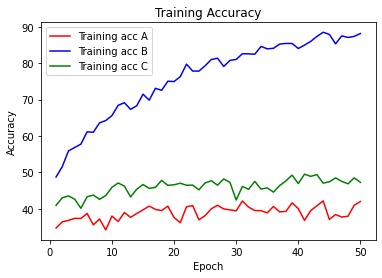

In [ ]:
print("Network A \n Training Accuracy - %d%% \n Testing Accuracy - %d%%" %(train_acc_A[len(test_acc_A)-1], test_acc_A[len(test_acc_A)-1]))
print("-"*30)
print("Network B \n Training Accuracy - %d%% \n Testing Accuracy - %d%%" %(train_acc_B[len(test_acc_B)-1], test_acc_B[len(test_acc_B)-1]))
print("-"*30)
print("Network C \n Training Accuracy - %d%% \n Testing Accuracy - %d%%" %(train_acc_C[len(test_acc_C)-1], test_acc_C[len(test_acc_C)-1]))

print("-"*60)

plt.plot(range(1, len(train_acc_A)+1), train_acc_A, label='Training acc A', color='red')
plt.plot(range(1, len(train_acc_B)+1), train_acc_B, label='Training acc B', color='blue')
plt.plot(range(1, len(train_acc_C)+1), train_acc_C, label='Training acc C', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()